#### Inner JOIN
```
SELECT *
FROM left_table
INNER JOIN right_table
ON left_table.id = right_table.id;
```
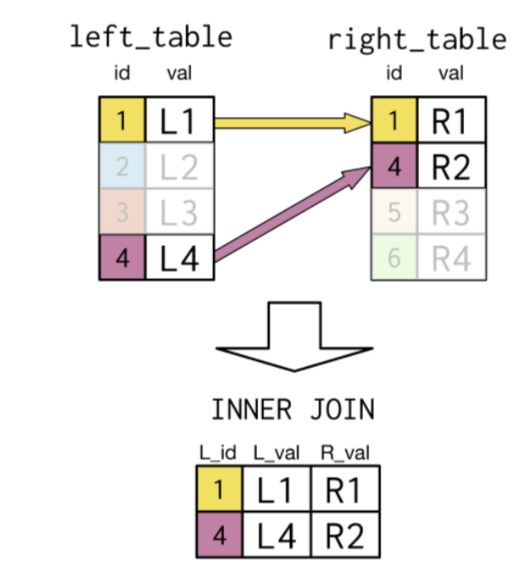

```
SELECT *
FROM prime_ministers;
```

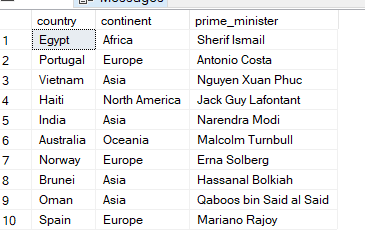

```
SELECT *
FROM presidents;
```
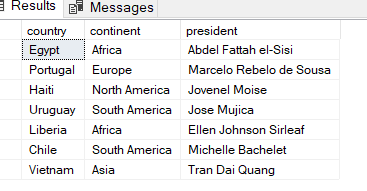
```
SELECT p1.country, p1.continent,
		prime_minister, president
FROM prime_ministers as p1
INNER JOIN presidents AS p2
ON p1.country = p2.country;
```
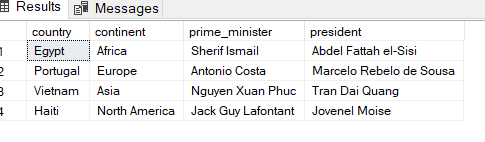


 
- You'll start off with a SELECT statement and then build up to an inner join with the cities and countries tables. Let's get to it!

```
-- Select all columns from cities
SELECT *
FROM cities;
```
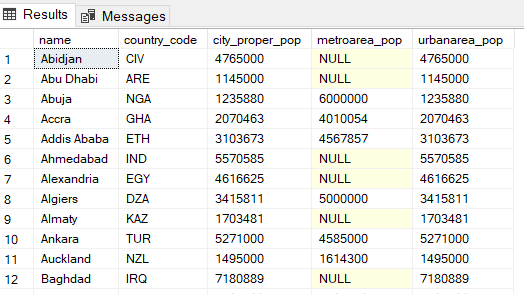
and the countries table is :
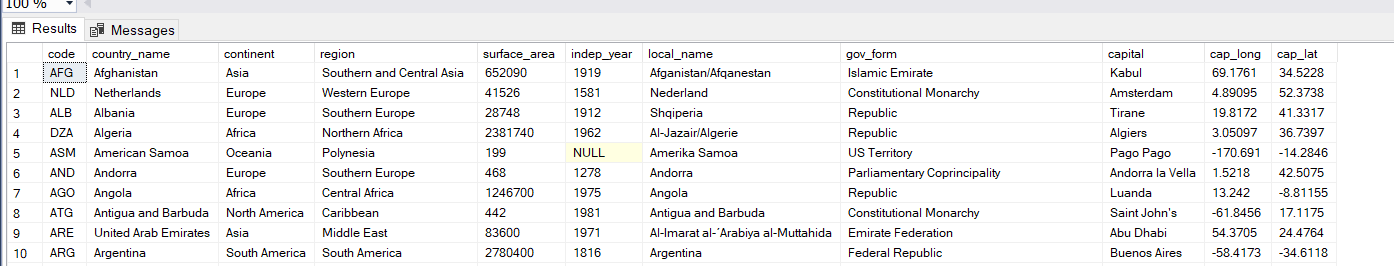
- Inner join the cities table on the left to the countries table on the right, keeping all of the fields in both tables.
```
SELECT * 
FROM cities
  -- 1. Inner join to countries
  INNER JOIN countries
    -- 2. Match on the country codes
    ON cities.country_code = countries.code;
 ```
 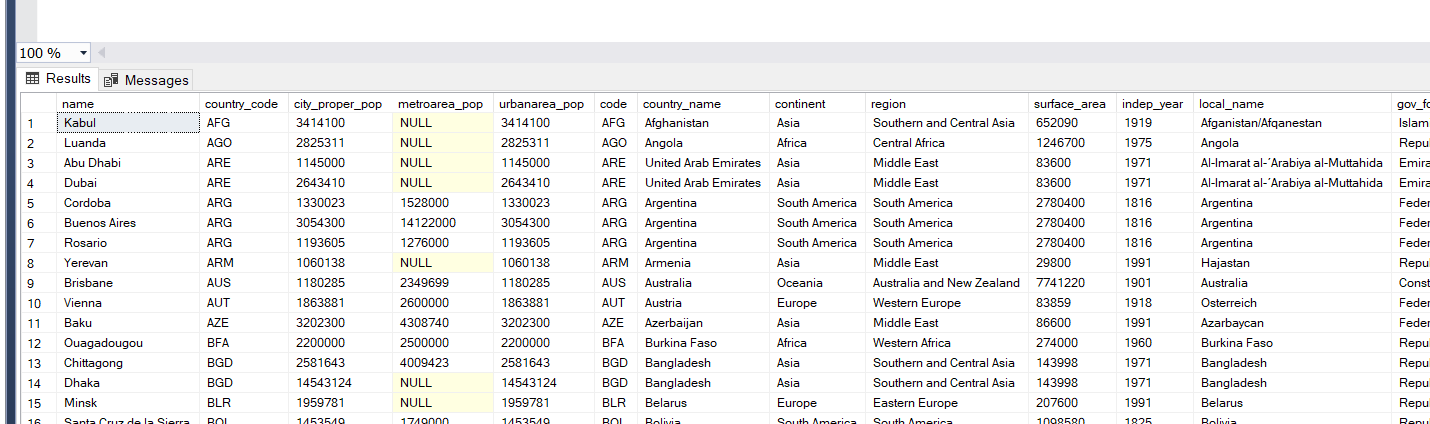
 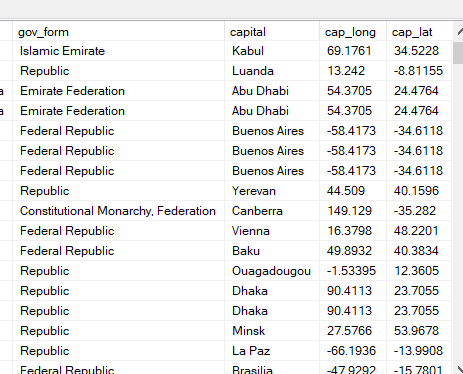
 
- Modify the SELECT statement to keep only the name of the city, the name of the country, and the name of the region the country resides in.
```
SELECT cities.name AS city, countries.name AS country, region
FROM cities
  INNER JOIN countries
    ON cities.country_code = countries.code;
```
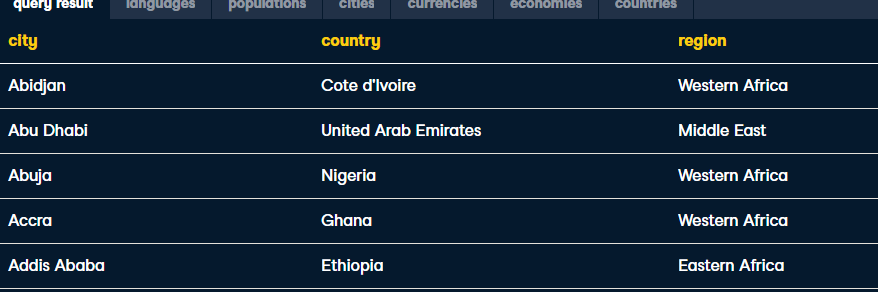
Instead of writing the full table name, you can use table aliasing as a shortcut. For tables you also use AS to add the alias immediately after the table name with a space. Check out the aliasing of cities and countries below.
```
SELECT c1.name AS city, c2.name AS country
FROM cities AS c1
INNER JOIN countries AS c2
ON c1.country_code = c2.code;
```
Notice that to select a field in your query that appears in multiple tables, you'll need to identify which table/table alias you're referring to by using a . in your SELECT statement.

You'll now explore a way to get data from both the countries and economies tables to examine the inflation rate for both 2010 and 2015.

Sometimes it's easier to write SQL code out of order: you write the SELECT statement after you've done the JOIN.


economies:
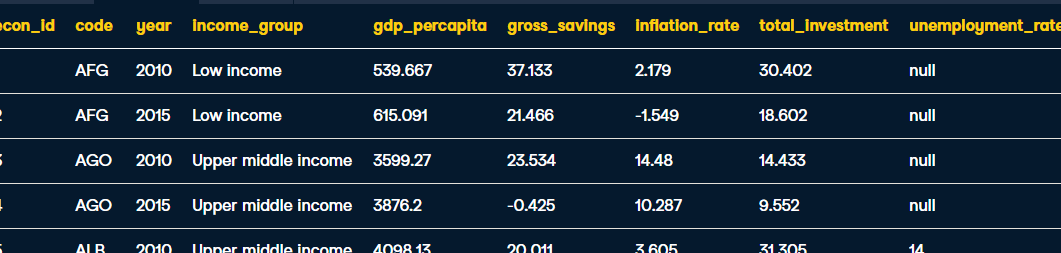
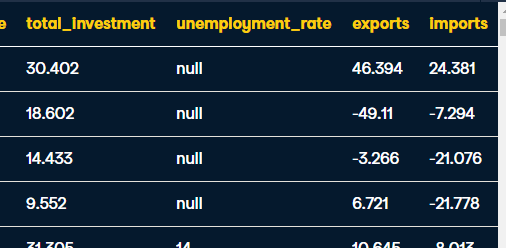

and 
countries is same as above.


- Join the tables countries (left) and economies (right) aliasing countries AS c and economies AS e.
     - Specify the field to match the tables ON.
- From this join, SELECT:
    - c.code, aliased as country_code.
    - name, year, and inflation_rate, not aliased.
    
 ```
SELECT c.code AS country_code, name, year, inflation_rate
FROM countries AS c
  INNER JOIN economies AS e
    ON c.code = e.code;
```
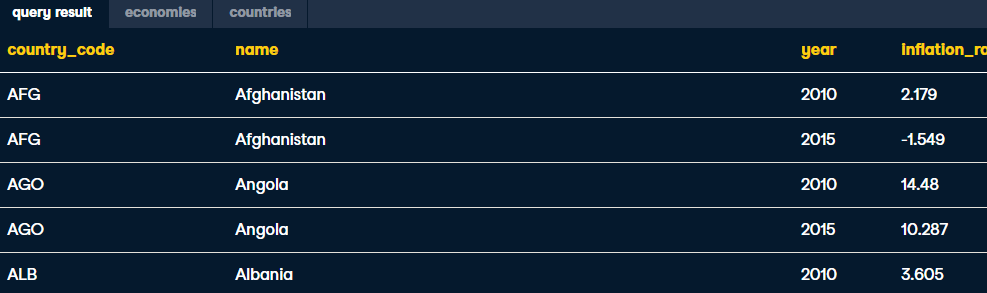    


The ability to combine multiple joins in a single query is a powerful feature of SQL, e.g:
```
SELECT *
FROM left_table
  INNER JOIN right_table
    ON left_table.id = right_table.id
  INNER JOIN another_table
    ON left_table.id = another_table.id;
```
As you can see here it becomes tedious to continually write long table names in joins. This is when it becomes useful to alias each table using the first letter of its name (e.g. countries AS c)! It is standard practice to alias in this way and, if you choose to alias tables or are asked to specifically for an exercise in this course, you should follow this protocol.

populations:
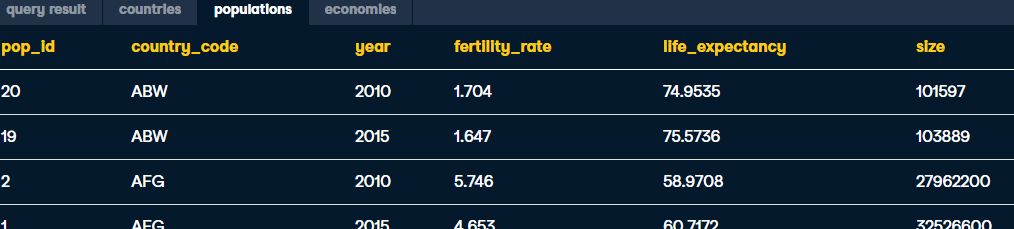

Now, for each country, you want to get the country name, its region, and the fertility rate and unemployment rate for both 2010 and 2015.


- Inner join countries (left) and populations (right) on the code and country_code fields respectively.
- Alias countries AS c and populations AS p.
- Select code, name, and region from countries and also select year and fertility_rate from populations (5 fields in total).

```
SELECT c.code, c.name, c.region, p.year, p.fertility_rate
FROM countries as c
  INNER JOIN populations as p
    ON 
  c.code = p.country_code
```
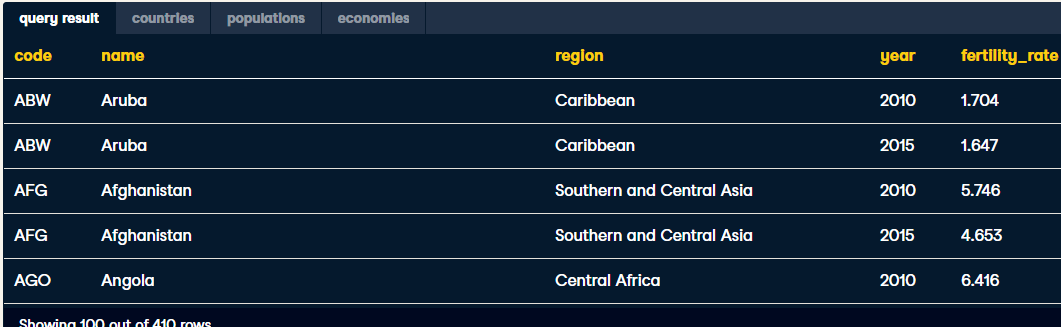


- Add an additional inner join with economies to your previous query by joining on code.
- Include the unemployment_rate column that became available through joining with economies.
- Note that year appears in both populations and economies, so you have to explicitly use e.year instead of year as you did before.
```
SELECT c.code, name, region, e.year, fertility_rate, unemployment_rate
  FROM countries AS c
  INNER JOIN populations AS p
    ON c.code = p.country_code
  INNER JOIN economies as e
    ON c.code = e.code;
```
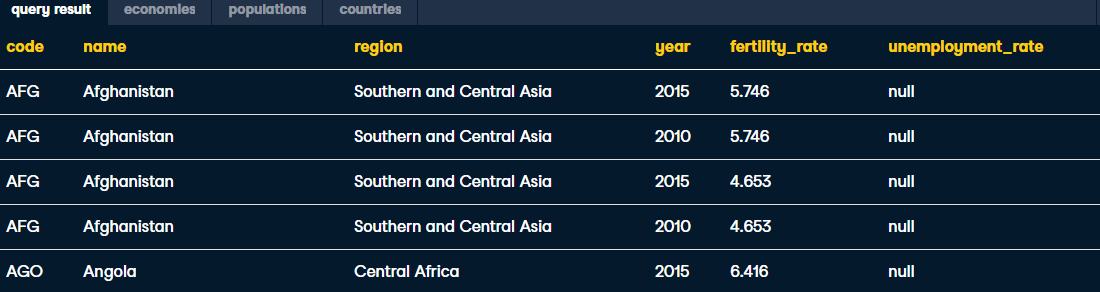

- Scroll down the query result and take a look at the results for Albania from your previous query. Does something seem off to you?
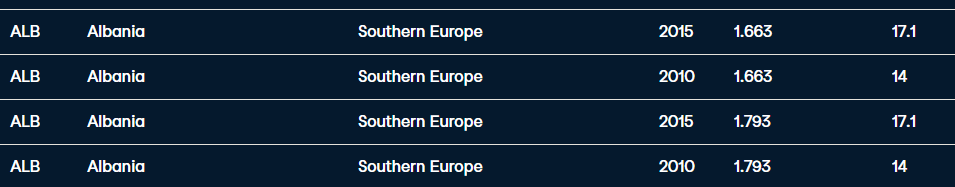

- The trouble with doing your last join on c.code = e.code and not also including year is that e.g. the 2010 value for fertility_rate is also paired with the 2015 value for unemployment_rate.
- Fix your previous query: in your last ON clause, use AND to add an additional joining condition. In addition to joining on code in c and e, also join on year in e and p.

SELECT c.code, name, region, e.year, fertility_rate, unemployment_rate
  FROM countries AS c
  INNER JOIN populations AS p
    ON c.code = p.country_code
  INNER JOIN economies AS e
    ON c.code = e.code AND e.year = p.year;
    
    
  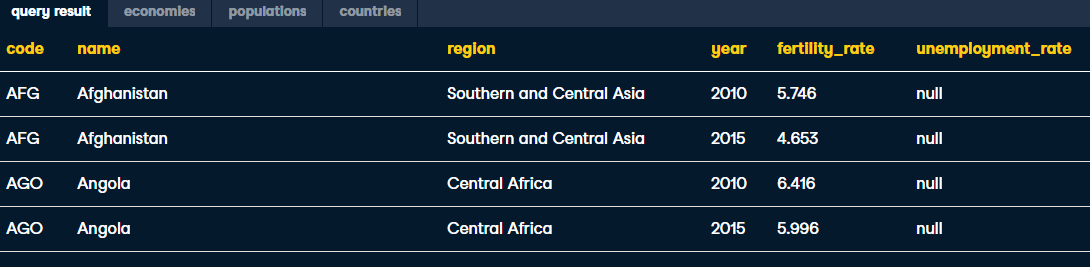